<a href="https://colab.research.google.com/github/RachelNderitu/Deep-Learning-for-Computer-Vision/blob/main/CNN_Wildlife_Rachel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

**2. Load Dataset**

This dataset contains images of various African wildlife species including elephants, zebras, buffalos, and rhinos.
It is designed for training and evaluating deep learning models in image classification and possibly object detection.

In [ ]:
!curl -L https://github.com/ultralytics/assets/releases/download/v0.0.0/african-wildlife.zip -o african-wildlife.zip

import zipfile
!unzip african-wildlife.zip -d african-wildlife

# Verify extraction
!ls african-wildlife

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  100M  100  100M    0     0  77.4M      0  0:00:01  0:00:01 --:--:--  130M
Archive:  african-wildlife.zip
replace african-wildlife/test/images/1 (103).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: african-wildlife/test/images/1 (103).jpg  
  inflating: african-wildlife/test/images/1 (121).jpg  
  inflating: african-wildlife/test/images/1 (128).jpg  
  inflating: african-wildlife/test/images/1 (130).jpg  
  inflating: african-wildlife/test/images/1 (131).jpg  
  inflating: african-wildlife/test/images/1 (137).jpg  
  inflating: african-wildlife/test/images/1 (144).jpg  
  inflating: african-wildlife/test/images/1 (154).jpg  
  inflating: african-wildlife/test/images/1 (168).jpg  
  inflating: african-wildlife/test/images/1 (171).jpg  
  i

**3. Data Exploration - This code helps verify that the dataset has been correctly downloaded and gives its size.**

In [ ]:
import os

base_dir = "african-wildlife"

image_count = 0
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_count += 1

print(f"✅ Total images found in dataset: {image_count}")


✅ Total images found in dataset: 1504


**The below code helps to identify the distinct animal species present in the dataset, which is useful for classification, through iterations through each label file. We have 4 class IDs, 0,1,2, and 3.**

In [ ]:
import os

# Get all label files
label_dir = "african-wildlife/train/labels"
label_files = os.listdir(label_dir)

# Store unique class IDs
class_ids = set()

# Read each label file
for file in label_files:
    with open(os.path.join(label_dir, file), "r") as f:
        for line in f:
            class_id = int(line.split()[0])  # Get first value (class ID)
            class_ids.add(class_id)

# Display unique class IDs
print("Unique class IDs found:", class_ids)

Unique class IDs found: {0, 1, 2, 3}


**The code below selects and displays one image per class from the validation set. It scans label files, extracts class IDs, maps them to class names, and retrieves corresponding images. Using OpenCV, it reads and converts images to RGB, then plots them with class labels. This provides a quick dataset preview, ensuring images and labels align correctly before training a CNN. It helps in visual validation of class distributions and data quality.**

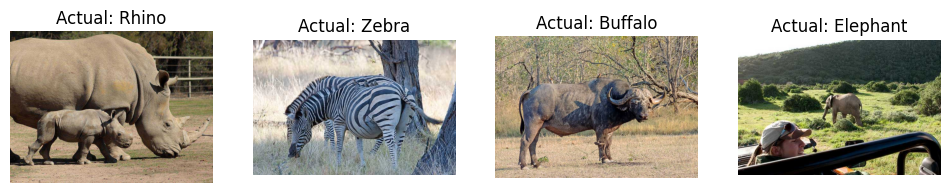

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define paths
image_folder = "african-wildlife/valid/images/"
label_folder = "african-wildlife/valid/labels/"

# Define class ID to class name mapping
class_map = {
    0: "Buffalo",
    1: "Elephant",
    2: "Rhino",
    3: "Zebra",
    # Add all available classes in your dataset
}

# Create a dictionary to store one image per class
selected_images = {}

# Loop through label files and pick one image per class
for label_file in os.listdir(label_folder):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_folder, label_file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])  # Get class ID
                if class_id not in selected_images:  # Store one image per class
                    selected_images[class_id] = label_file.replace(".txt", ".jpg")

    if len(selected_images) == 4:  # Stop when 4 classes are found
        break

# Display selected images
plt.figure(figsize=(12, 6))

for i, (class_id, image_file) in enumerate(selected_images.items()):
    image_path = os.path.join(image_folder, image_file)

    # Read image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Image {image_file} not found.")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot image with class name
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Actual: {class_map.get(class_id, 'Unknown')}")

plt.show()


**4. Load and Preprocess the data**

This script creates a CSV file mapping image paths to their corresponding class labels for the African Wildlife dataset. It processes train, validation, and test sets separately and saves them as CSV files. The CSV files facilitate data loading, meaning that CSV file format can be used for efficient dataset preprocessing in deep learning models. CSV file formats are also flexible and can be used in TensorFlow/Keras, PyTorch, or other ML frameworks for structured training.

In [ ]:
import pandas as pd

def create_classification_csv(image_folder, label_folder, output_csv):
    data = []

    for label_file in os.listdir(label_folder):
        img_file = label_file.replace(".txt", ".jpg")  # Match image filename
        label_path = os.path.join(label_folder, label_file)
        img_path = os.path.join(image_folder, img_file)

        with open(label_path, "r") as f:
            first_line = f.readline().strip()
            class_id = int(first_line.split()[0])  # Get class ID

        # Get class name from dictionary
        class_name = class_map.get(class_id, "unknown")

        data.append([img_path, class_name])

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(data, columns=["image_path", "label"])
    df.to_csv(output_csv, index=False)
    print(f"Saved: {output_csv}")

# Generate CSVs for train, valid, and test sets
create_classification_csv("african-wildlife/train/images", "african-wildlife/train/labels", "train.csv")
create_classification_csv("african-wildlife/valid/images", "african-wildlife/valid/labels", "valid.csv")
create_classification_csv("african-wildlife/test/images", "african-wildlife/test/labels", "test.csv")

Saved: train.csv
Saved: valid.csv
Saved: test.csv


**The code below prepares the dataset for training, validation, and testing using Keras' `ImageDataGenerator` and `flow_from_dataframe`. It reads CSV files containing image paths and labels, resizes images to 224×224, and normalizes pixel values. The training set undergoes data augmentation (rotation, zoom, shift, flip) to improve generalization, while the validation and test sets are only rescaled. Images are dynamically loaded in batches of 32, with the test set remaining unshuffled for evaluation consistency. This setup ensures efficient preprocessing, automated loading, and proper augmentation, making the dataset ready for CNN training.**

In [ ]:
# Define image size and batch size
IMG_SIZE = (224, 224)  # Resizing all images to 224x224
BATCH_SIZE = 32

# Read CSV files
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

# Create ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values (0-255 → 0-1)
    rotation_range=20,     # Rotate images randomly
    width_shift_range=0.2, # Horizontal shift
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Validation & Test set should NOT have augmentation
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col="image_path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = valid_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # No shuffling for test set
)


Found 1049 validated image filenames belonging to 4 classes.
Found 225 validated image filenames belonging to 4 classes.
Found 227 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


**5.Build a CNN for Image Classification**







**Build the model**

The code below defines a Convolutional Neural Network (CNN) model using TensorFlow/Keras for classifying the African Wildlife images. The architecture includes convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully connected layers for classification.

**We define a Convolutional Neural Network (CNN) with;**
*   Convolutional layers to extract image features.
*   MaxPooling layers to reduce dimensions.
*   Fully connected layers for classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    # Flattening
    Flatten(),

    # Fully connected layers
    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting

    Dense(4, activation="softmax")  # Output layer (4 classes)
])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

**Compile and Train the Model**

The code below compiles and trains the CNN model for classifying using TensorFlow/Keras. It defines the optimizer, loss function, and evaluation metrics, then trains the model using the training and validation datasets. This step trains the CNN model to recognize different African Wildlife species by optimizing parameters. The validation set helps monitor overfitting and model performance after each epoch.

**Model Compilation**

* **Optimizer: "adam"** → Adaptive optimization for faster and more stable training
* **Loss: "categorical_crossentropy"** → Suitable for multi-class classification.
* **Metric: "accuracy"** → Evaluates how well the model classifies images.

**Model Training (fit function)**
* Uses train_generator (augmented images) as input.
* Validates with valid_generator after each epoch.
* Runs for 30 epochs to allow sufficient learning..


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.2983 - loss: 2.0245 - val_accuracy: 0.4444 - val_loss: 1.2089
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.4449 - loss: 1.1921 - val_accuracy: 0.5644 - val_loss: 1.0954
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.4876 - loss: 1.1131 - val_accuracy: 0.4844 - val_loss: 1.8330
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5469 - loss: 1.0186 - val_accuracy: 0.4311 - val_loss: 2.4725
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.5722 - loss: 0.9407 - val_accuracy: 0.5778 - val_loss: 1.4377
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5767 - loss: 0.9449 - val_accuracy: 0.5644 - val_loss: 1.3410
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.6051 - loss: 0.9097 - val_accuracy: 0.4622 - val_loss: 3.0062
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5838 - loss: 0.9160 - val_accuracy: 0.5867 - val_loss: 1.

**In the code below, we plot graphs to illustrate the training and validation accuracy (left) and training and validation loss (right) over the 30 epochs of CNN training**

**Training and Validation Accuracy** -
The training accuracy (blue line) shows a steady improvement over the 30 epochs, indicating that the model is effectively learning patterns from the training data. On the other hand, the validation accuracy (orange line) fluctuates throughout the training process but shows a slight upward trend overall. This indicates that while the model is improving on unseen data, the fluctuations suggest inconsistencies in generalization, which may stem from issues such as class imbalance, insufficient training data, or variability in the validation set.

**Training and Validation Loss** -
The training loss (blue line) decreases consistently, reflecting that the model is minimizing errors on the training set effectively. However, the validation loss (orange line) fluctuates significantly and does not exhibit a clear downward trend. These fluctuations could indicate overfitting, where the model is becoming too specialized in the training data and struggles to generalize to unseen validation data.

**Recommendations** - To address overfitting and improve generalization, we can increase regularization by using a higher dropout rate, and enhance the training set with more extensive data augmentation. Early stopping can also be implemented to prevent overtraining and ensure the training and validation sets are balanced and representative of similar distributions. Additionally, we can analyze the dataset for potential class imbalances or variability issues that could be affecting validation performance.

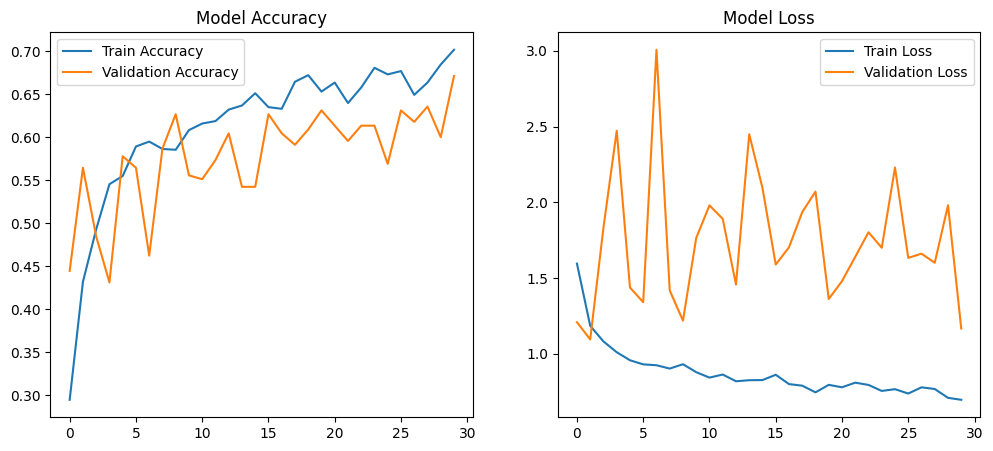

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Model Loss")

plt.show()



**Accuracy Results**

The model was evaluated on the test dataset, achieving a test accuracy of 71.37% and a test loss of 0.7887. This indicates that the model performs reasonably well in classifying unseen data, though there is still room for improvement. The moderate loss suggests the model has learned meaningful patterns but may still struggle with certain classes or generalization. Further enhancements, such as better preprocessing, fine-tuning hyperparameters, or addressing potential dataset issues, could improve performance.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)

print(f"\nTest Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7376 - loss: 0.7872

Test Accuracy: 71.37%
Test Loss: 0.7887


**6. Model Prediction and Evaluation**

This step involves testing the model on the test images to evaluate its predictions qualitatively. First, it retrieves class indices and reverses the mapping to convert numeric predictions back to class names. A batch of test images and their true labels is then fetched, and the model predicts class probabilities, which are converted to class IDs and mapped to class names. Finally, it visualizes a subset of test images with their predicted and actual labels for comparison. The purpose is to assess the model's performance qualitatively, identify misclassifications, and gain insights into specific classes or features where the model may be underperforming, complementing the quantitative evaluation metrics like accuracy and loss.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


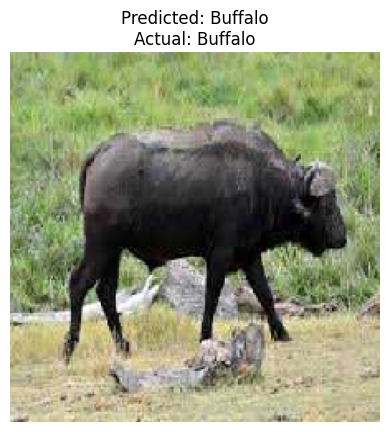

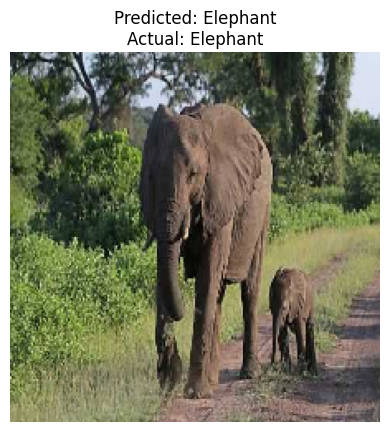

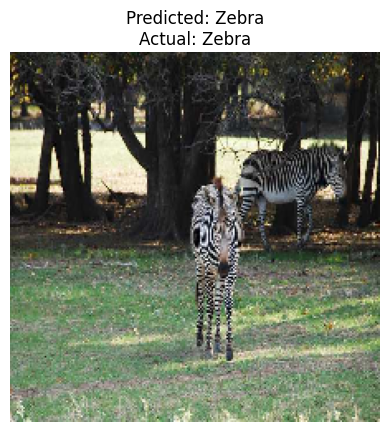

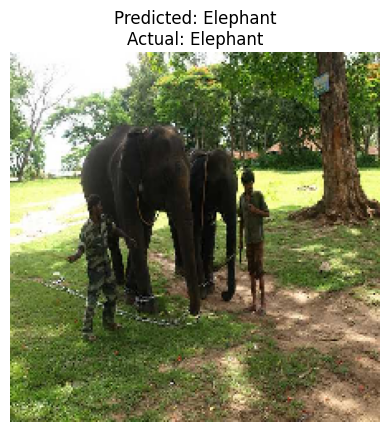

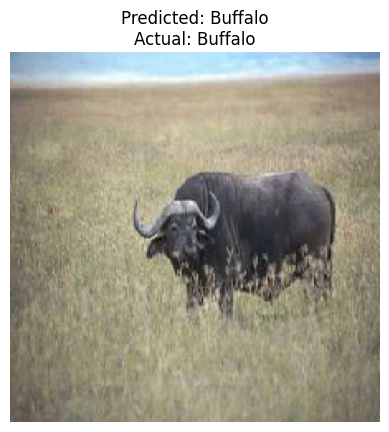

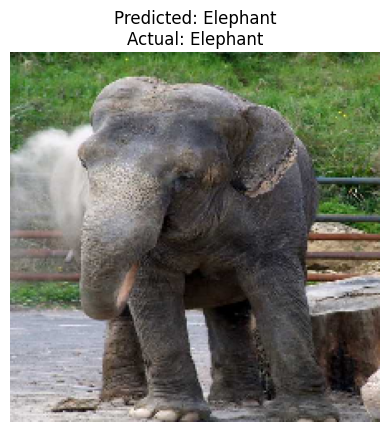

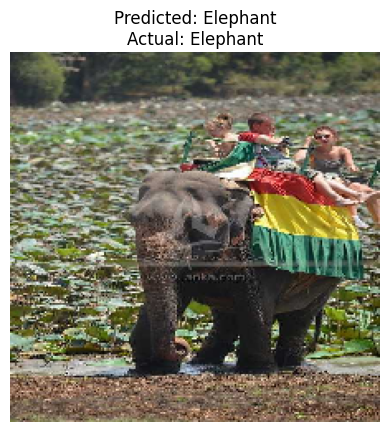

In [ ]:
import numpy as np

# Get the class labels
class_indices = train_generator.class_indices  # {'buffalo': 0, 'elephant': 1, 'rhino': 2, 'zebra': 3}
class_labels = {v: k for k, v in class_indices.items()}  # Reverse dictionary

# Get some test images
test_images, test_labels = next(test_generator)  # Fetch one batch
predictions = model.predict(test_images)

# Convert predictions to class names
predicted_classes = np.argmax(predictions, axis=1)  # Get highest probability class
predicted_labels = [class_labels[i] for i in predicted_classes]

# Actual labels
true_labels = np.argmax(test_labels, axis=1)
actual_labels = [class_labels[i] for i in true_labels]

# Display results
for i in range(7):  # Show 7 predictions
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis("off")
    plt.show()

**7. Model Performance Evaluation**

The code below evaluates the model's performance on the test dataset using a classification report and confusion matrix. It compares the true labels with the predicted labels, generating a detailed classification report that provides metrics such as precision, recall, F1-score, and support for each class. The confusion matrix visualizes true vs. predicted label counts, helping identify common misclassifications and patterns. A heatmap is used to make the confusion matrix easier to interpret. This step provides a comprehensive quantitative and visual analysis of the model's strengths and weaknesses, highlighting areas for improvement in classification performance.


The confusion matrix reveals that the model performs best on the Zebra class, with 59 correct predictions and minimal misclassifications, while it struggles the most with the Rhino class, where many instances are misclassified as Buffalo or Elephant. There is notable confusion between Elephants and Rhinos, likely due to visual similarities in features or backgrounds. The model is fairly accurate overall but shows room for improvement in distinguishing similar-looking classes. This indicates a need for better feature learning or more diverse data for these challenging categories.

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
              precision    recall  f1-score   support

     Buffalo       0.64      0.98      0.77        49
    Elephant       0.64      0.62      0.63        58
       Rhino       0.66      0.35      0.45        55
       Zebra       0.88      0.91      0.89        65

    accuracy                           0.71       227
   macro avg       0.70      0.71      0.69       227
weighted avg       0.71      0.71      0.69       227



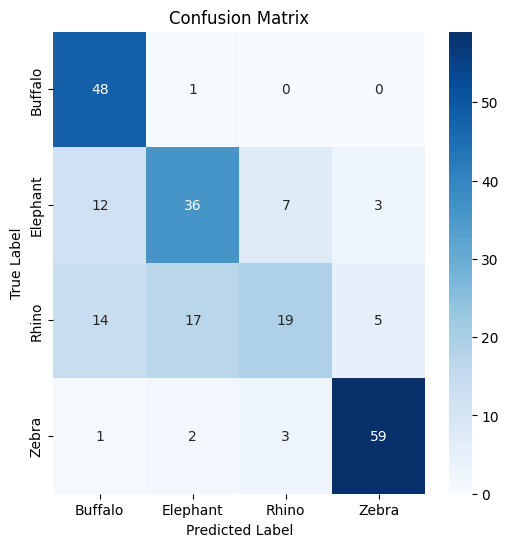

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predicted labels for all test images
true_classes = test_generator.classes
pred_classes = np.argmax(model.predict(test_generator), axis=1)

# Print classification report
print(classification_report(true_classes, pred_classes, target_names=class_labels.values()))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**8. Saving the trained model**

The code saves the trained model to a file named `my_model.keras`, enabling it to be reused later for inference, evaluation, or further training without retraining. The `model.save()` function stores the complete model, including its architecture, weights, training configuration (loss, optimizer, and metrics), and optimizer state, allowing training to resume seamlessly. This step ensures the model is preserved for deployment or sharing, making it easy to load using `keras.models.load_model()` when needed. It is essential for deploying the model in real-world applications or collaborating with others.

In [ ]:
# Save the trained model
model.save('my_model.keras')

print("Model saved successfully!")

Model saved successfully!
